# PMR3508 Aprendizado de Máquina e Reconhecimento de Padrões
                                      Bases Adult e HouseholdIncome - Classificador kNN

* Autor: PMR3508-2019-42

## 1. Base Adult

Imports necessários:

In [1]:
# Manipulação dos dados
import pandas as pd
import numpy as np

# Visualização 
import matplotlib.pyplot as plt
import os

# Técnica de Machine Learning
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing as prep

In [2]:
os.listdir("../Adult/Kaggle")

['sample_submission.csv', 'test_data.csv', 'train_data.csv']

### 1.1 Entendendo os dados

In [3]:
adult = pd.read_csv("../Adult/Kaggle/train_data.csv",
        names = [
            "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
            "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
            "Hours per week", "Country", "Target"],
        sep= r'\s*,\s*',
        engine= 'python',
        na_values= "?")

adult.shape

(32561, 15)

In [4]:
adult.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


#### 1.11 Análise das features mais relevantes

In [5]:
adult.describe()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
count,32561,30725,32561,32561,32561,32561,30718,32561,32561,32561,32561,32561,32561,31978,32561
unique,74,9,21648,17,17,8,15,7,6,3,120,93,95,42,3
top,36,Private,203488,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
freq,898,22696,13,10501,10501,14976,4140,13193,27815,21789,29849,31041,15216,29169,24719


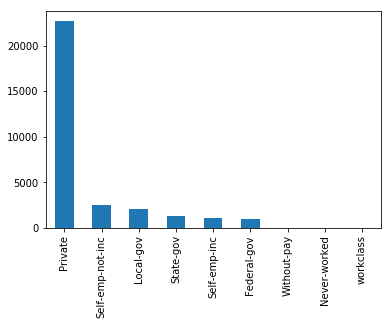

In [6]:
adult["Workclass"].value_counts().plot(kind = "bar")

In [7]:
adult["Martial Status"].value_counts()

Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
marital.status               1
Name: Martial Status, dtype: int64

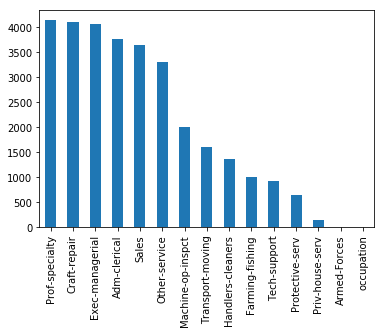

In [8]:
adult["Occupation"].value_counts().plot(kind = 'bar')

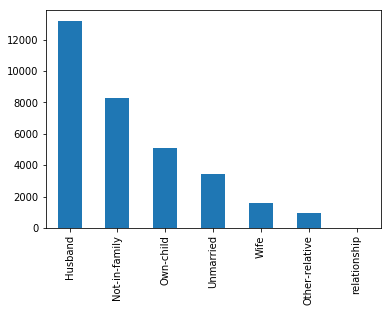

In [9]:
adult["Relationship"].value_counts().plot(kind = 'bar')

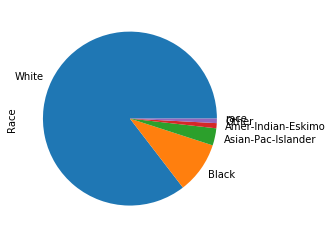

In [10]:
adult["Race"].value_counts().plot(kind = 'pie')

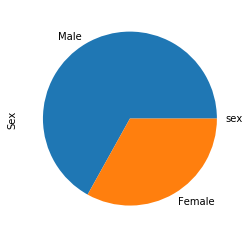

In [11]:
adult["Sex"].value_counts().plot(kind = 'pie')

In [12]:
adult["Country"].value_counts()

United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

Conclusões

* Na feature "Country" predomina USA, logo, é descartável

* "Education" descartável, pois há "Education-Num"

* "fnlwgt" será descartado, pois não é relevante para a predição

#### 1.12 Análise dos dados faltantes

In [13]:
adult.isnull().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-Num        0
Martial Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per week       0
Country            583
Target               0
dtype: int64

As features 'Workclass', 'Occupation' e 'Country' concentram os dados faltantes

* Estratégia: inserir a moda da feature no lugar dos dados faltantes

In [14]:
moda = adult['Workclass'].describe().top
adult['Workclass'] = adult['Workclass'].fillna(moda)

moda = adult['Occupation'].describe().top
adult['Occupation'] = adult['Occupation'].fillna(moda)

moda = adult['Country'].describe().top
adult['Country'] = adult['Country'].fillna(moda)

adult.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Martial Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours per week    0
Country           0
Target            0
dtype: int64

#### 1.13 Dados de Teste

In [15]:
testAdult = pd.read_csv("../Adult/Kaggle/test_data.csv",
            names = [
            "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
            "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
            "Hours per week", "Country", "Target"],
        sep= r'\s*,\s*',
        engine= 'python',
        na_values= "?")

testAdult.shape

(16281, 15)

In [16]:
testAdult.isnull().sum()

Age                 0
Workclass         964
fnlwgt              1
Education           1
Education-Num       1
Martial Status      1
Occupation        967
Relationship        1
Race                1
Sex                 1
Capital Gain        1
Capital Loss        1
Hours per week      1
Country           275
Target              1
dtype: int64

A estratégia de tratamento de dados faltantes será a mesma que foi aplicada aos dados de treino.
Como a feature "fnlwgt" não é relevante, somente a feature "Relationship" será tratada. Em "Target" a exclusão das linhas é mais conveniente.

In [17]:
moda = testAdult['Workclass'].describe().top
testAdult['Workclass'] = testAdult['Workclass'].fillna(moda)

moda = testAdult['Occupation'].describe().top
testAdult['Occupation'] = testAdult['Occupation'].fillna(moda)

moda = testAdult['Country'].describe().top
testAdult['Country'] = testAdult['Country'].fillna(moda)

testAdult.isnull().sum()

Age               0
Workclass         0
fnlwgt            1
Education         1
Education-Num     1
Martial Status    1
Occupation        0
Relationship      1
Race              1
Sex               1
Capital Gain      1
Capital Loss      1
Hours per week    1
Country           0
Target            1
dtype: int64

In [18]:
nTestAdult = testAdult.dropna()

nTestAdult.shape

(16281, 15)

In [19]:
nTestAdult.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,Private,103497.0,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


#### 1.14 Transformação dos dados não-numéricos em valores numéricos

In [20]:
adult = adult.apply(prep.LabelEncoder().fit_transform)

nTestAdult = nTestAdult.apply(prep.LabelEncoder().fit_transform)

In [21]:
adult.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,22,6,2671,9,12,4,0,1,4,1,25,0,39,38,0
1,33,5,2926,9,12,2,3,0,4,1,0,0,12,38,0
2,21,3,14086,11,8,0,5,1,4,1,0,0,39,38,0
3,36,3,15336,1,6,2,5,0,2,1,0,0,39,38,0
4,11,3,19355,9,12,2,9,5,2,0,0,0,39,4,0


### 1.2 Classificador k-NN

* Primeiro Teste: k = 5 usando somente dados númericos

In [22]:
atributos = ["Age", "Education-Num", "Capital Gain", "Capital Loss", "Hours per week"]

x_train = adult[atributos]
y_train = adult.Target

x_test = nTestAdult[atributos]
y_test = nTestAdult.Target

In [23]:
knn = KNeighborsClassifier(n_neighbors = 5)

scores = cross_val_score(knn, x_train, y_train, cv=10)
scores.mean()

0.8138571506164384

In [24]:
knn.fit(x_train, y_train)

y_predict = knn.predict(x_test)

accuracy_score(y_test, y_predict)

0.8079356304895277

* Segundo Teste: k = 25 usando somente dados númericos

In [25]:
knn = KNeighborsClassifier(n_neighbors = 25)

scores = cross_val_score(knn, x_train, y_train, cv=10)
scores.mean()

0.8240227908289007

In [26]:
knn.fit(x_train, y_train)

y_predict = knn.predict(x_test)

accuracy_score(y_test, y_predict)

0.8251950125913642

* Terceiro Teste: k = 25 usando dados númericos e não numéricos

In [27]:
atributos = ["Age", "Workclass", "Education-Num", "Occupation", "Race", "Capital Gain", "Capital Loss", "Hours per week"]

x_train = adult[atributos]
y_train = adult.Target

x_test = nTestAdult[atributos]
y_test = nTestAdult.Target

In [28]:
knn = KNeighborsClassifier(n_neighbors = 25)

scores = cross_val_score(knn, x_train, y_train, cv=10)
scores.mean()

0.8273396781379588

In [29]:
knn.fit(x_train, y_train)

y_predict = knn.predict(x_test)

accuracy_score(y_test, y_predict)

0.8265462809409742

Pelos resultados é perceptível que a mescla de atributos numéricos com não numéricos apresentou melhor resultado. Agora deve-se encontrar o melhor hiperparâmetro k

#### 1.21 Treinamento e Validação Cruzada para encontrar o melhor hiperparâmetro k

In [30]:
    inf = 1
    sup = 35

    scores_media = []
    aux = 0
    k_max = 0

    i = 0
    for k in range(inf, sup):
        knn = KNeighborsClassifier(n_neighbors = k)
        scores = cross_val_score(knn, x_train, y_train, cv=10)
        scores_media.append(scores.mean())

        if scores_media[i] > aux:
            k_max = k
            aux = scores_media[i]

        i = i + 1

    print(k_max)

30


Text(0.5, 1.0, 'Perfomance do algoritmo conforme o valor de k')

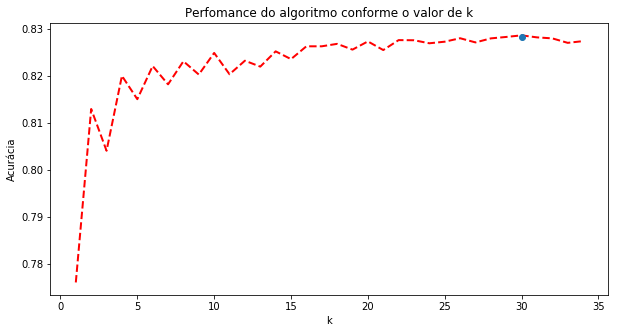

In [31]:
x = np.arange(1, sup)

plt.figure(figsize=(10, 5))
plt.plot(x, scores_media, '--', color = 'red', linewidth = 2)
plt.plot(k_max, scores_media[k_max], 'o')

plt.xlabel('k')
plt.ylabel('Acurácia')
plt.title('Perfomance do algoritmo conforme o valor de k')

In [32]:
print('Acurácia para k = {0} : {1:2.2f}%'.format(k_max, 100 * scores_media[k_max]))

Acurácia para k = 30 : 82.83%


No gráfico acima pode-se observar a acurácia obtida através da validação cruzada conforme o valor de k.

#### 1.22 Teste com o melhor hiperparâmetro

In [33]:
k = k_max

knn = KNeighborsClassifier(n_neighbors = k)

In [34]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform')

In [35]:
y_predict = knn.predict(x_test)

y_predict

array([0, 0, 0, ..., 1, 1, 0])

#### 1.23 Acurácia

In [36]:
accuracy_score(y_test, y_predict)

0.8271604938271605

#### 1.24 Submissão dos Resultados

In [37]:
predict = []

for i in range(len(y_predict)):
    if y_predict[i] == 0:
        predict.append('<=50K')
    else:
        predict.append('>50K')

result = pd.DataFrame(predict, columns = ["income"])
result.to_csv("Resultados_Adult.csv", index_label="Id")

result

,income
0,<=50K
1,<=50K
2,<=50K
3,>50K
4,<=50K
5,<=50K
6,<=50K
7,<=50K
8,<=50K
9,<=50K


## 2. Base HouseholdIncome - Exercício Extra

Imports necessários:

In [38]:
# Manipulação dos dados
import pandas as pd
import numpy as np

# Visualização 
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Técnica de Machine Learning
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [39]:
os.listdir("../HouseholdIncome/Kaggle")

['sample_submission.csv', 'test.csv', 'train.csv']

### 2.1 - Entendendo os dados

Determinação das bases

In [40]:
train = pd.read_csv("../HouseholdIncome/Kaggle/train.csv")
test = pd.read_csv("../HouseholdIncome/Kaggle/test.csv")

train.info()

train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [41]:
test.info()

test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


Tradução dos rótulos

* 1 = extreme poverty 
* 2 = moderate poverty 
* 3 = vulnerable households 
* 4 = non vulnerable households

Tipos de dados

* Dados Int: certamente se referem às features binárias
* Dados floats: referem-se às variáveis contínuas 
* Dados object: não serão usados devido a dificuldade em trabalhar com machine learning

Análise da distribuição das variáveis contínuas conforme o rótulo

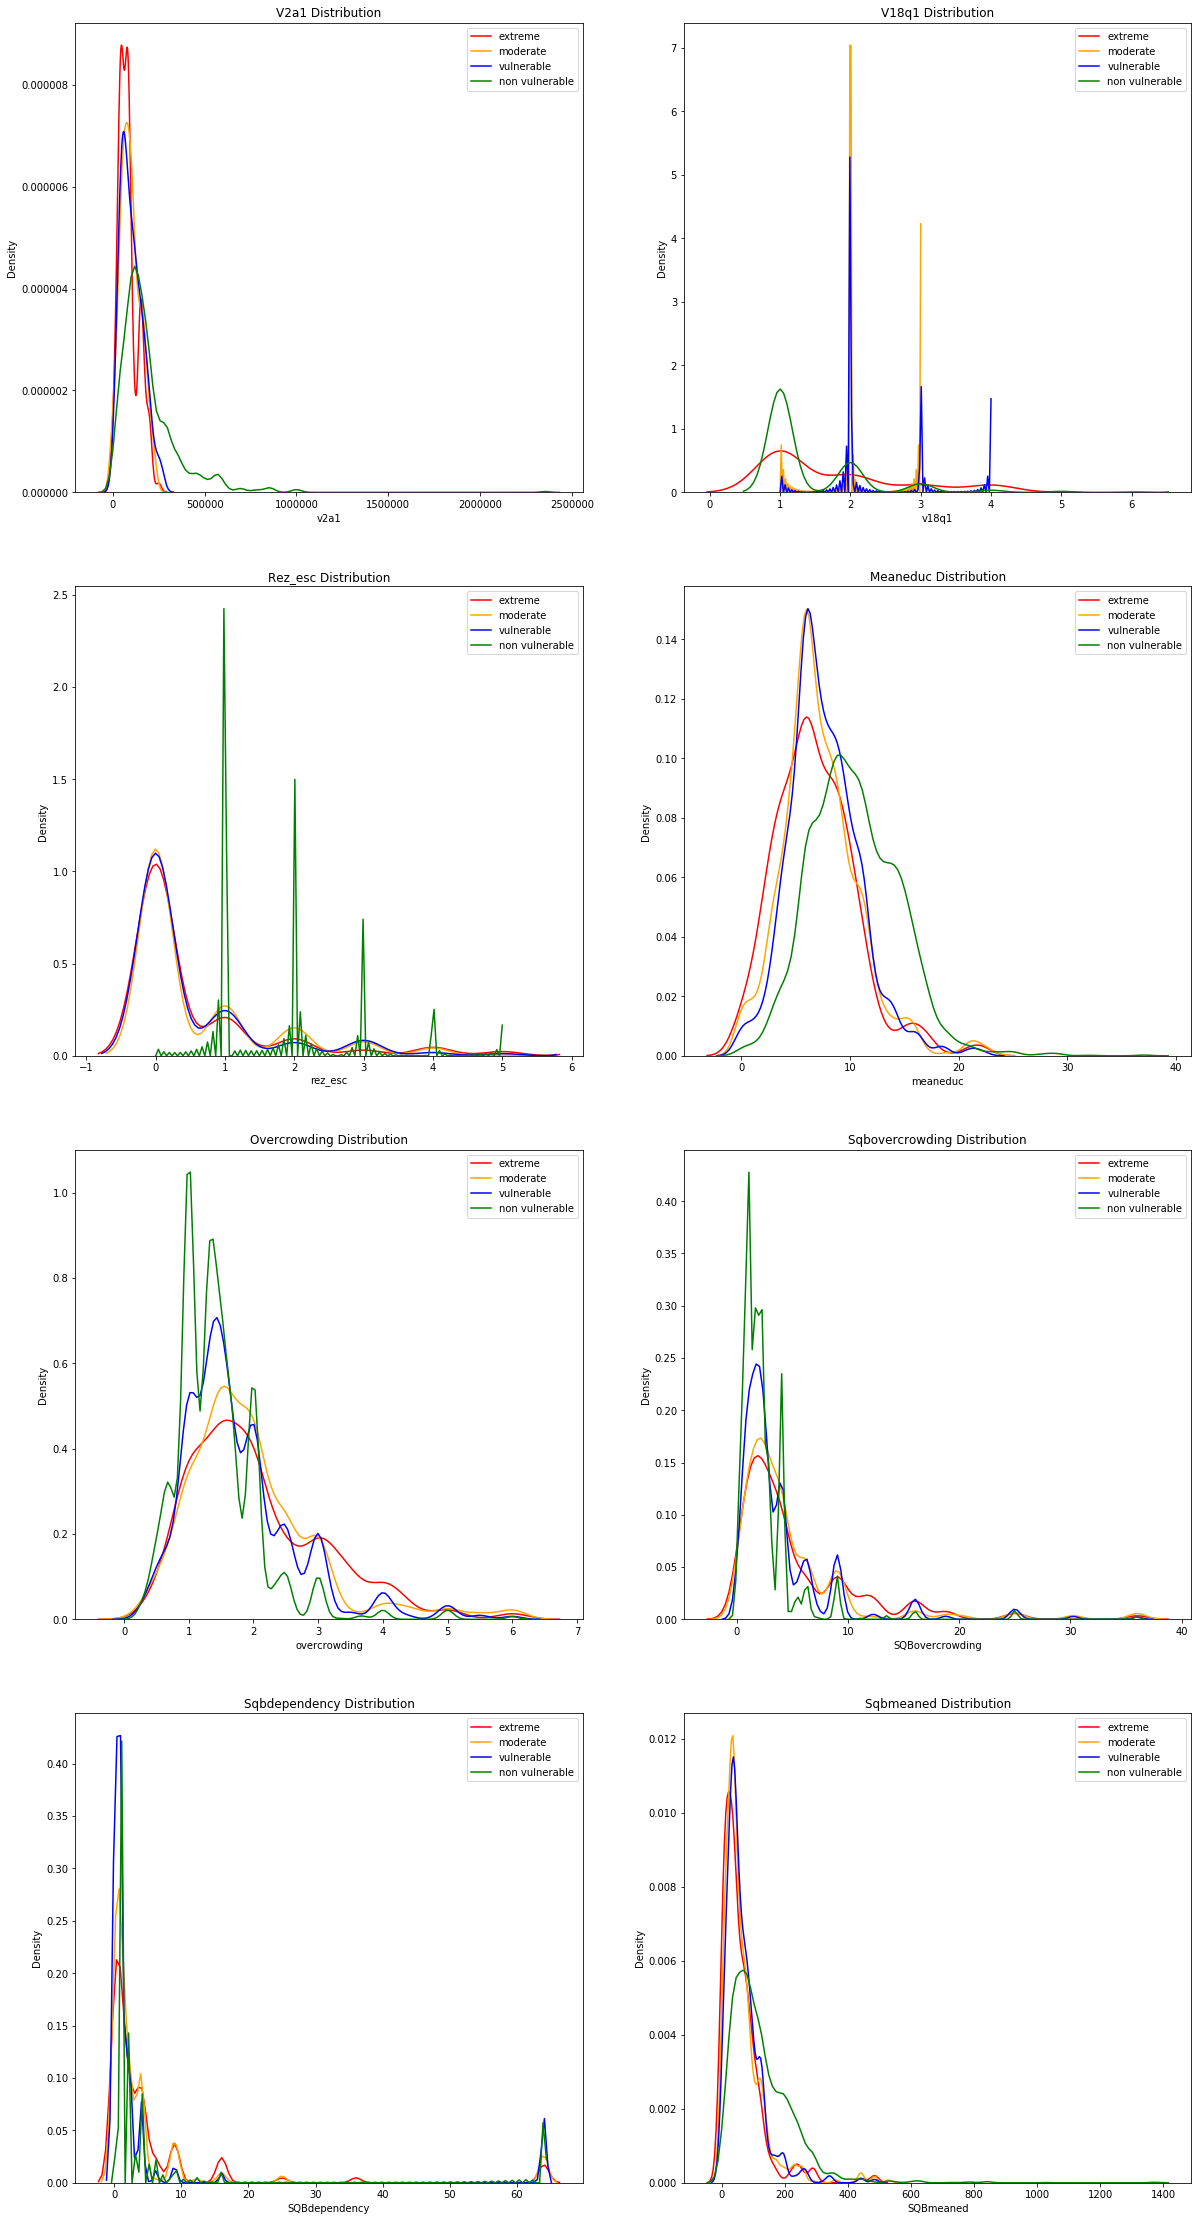

In [42]:
from collections import OrderedDict

plt.figure(figsize = (20, 16))

cores = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
pobreza = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i + 1)
    
    for nivel, cor in cores.items():
       
        sns.kdeplot(train.loc[train['Target'] == nivel, col].dropna(), 
                    ax = ax, color = cor, label = pobreza[nivel])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')
    
    plt.subplots_adjust(top = 2)

Como a feature "parentesco1" indica o chefe da família, que reprenta toda a família e assim está diretamente relacionado ao rótulo, passa a ser interessante saber a distribuição dos rótulos.

1     222
2     442
3     355
4    1954
Name: Target, dtype: int64

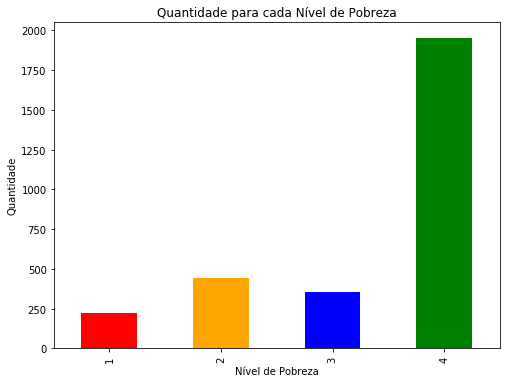

In [43]:
rotulos = train.loc[(train['Target'].notnull()) & (train['parentesco1'] == 1), ['Target', 'idhogar']]

quantidade = rotulos['Target'].value_counts().sort_index()

quantidade.plot.bar(figsize = (8, 6), color = cores.values())

plt.xlabel('Nível de Pobreza')
plt.ylabel('Quantidade')
plt.title('Quantidade para cada Nível de Pobreza')


quantidade

Há mais famílias em situação de não vulnerabilidade (rótulo 4).

Tal distribuição pode representar um problema, já que em média podemos afirmar que a população da Costa Rica não está em vulnerabilidade, o que de fato é verdade pela distribuição, mas tal configuração pode atrapalhar a classificação do modelo de machine learning

#### 2.11 Identificando erros

Devido ao problema de distribuição talvez pessoas da mesma família tenham rótulos diferentes, então é necessário verificar tal situação

In [44]:
igualdade = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

desigualdade = igualdade[igualdade != True]

print('Há {} famílias com membros de rótulos diferentes'.format(len(desigualdade)))

Há 85 famílias com membros de rótulos diferentes


A partir do resultado é conveniente padronizar a família pelo rótulo do chefe, mas como a acurácia será medida somente em relação ao chefe, então não será necessário

#### 2.12 Limpeza dos dados

In [45]:
colunas_nulas = train.isnull().sum().sort_values(ascending = False)

porcentagem = ((train.isnull().sum()/train.isnull().count())*100).sort_values(ascending = False)

faltantes = pd.concat([colunas_nulas, porcentagem], axis = 1, keys = ['Total', '%'])
faltantes.head()

,Total,%
rez_esc,7928,82.954902
v18q1,7342,76.823271
v2a1,6860,71.779847
meaneduc,5,0.052318
SQBmeaned,5,0.052318


* v2a1 - Pagamento mensal de aluguel

Tal atributo se relaciona diretamente com a distribuição de 'tipovivi1' que refere-se a quem tem a casa própria e totalmente paga. A estratégia então é preencher com zero o valor da renda mensal de quem possui a casa totalmente paga

Para os demais dados faltantes a alternativa será retirar os dados

In [46]:
train.loc[(train['tipovivi1'] == 1), 'v2a1'] = 0

print('Ainda restam {} dados faltantes para v2a1'.format(train['v2a1'].isnull().sum()))

Ainda restam 949 dados faltantes para v2a1


* rez_esc - Anos atrasado na escola

Tal atributo se relaciona com a idade do indivíduo, então é interessante analisar os dados faltantes de acordo com a idade

In [47]:
train.loc[train['rez_esc'].notnull()]['age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [49]:
train.loc[train['rez_esc'].isnull()]['age'].describe()

count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

A maioria dos dados faltantes se relacionam com adultos, enquanto os dados presentes se relacionam com os jovens, no caso de no máximo 17 anos.
Na descrição da base é possível verificar que 'rez_esc' é definida apenas para indivíduos entre 7 e 19 anos, logo, é conveniente zerar o atributo dos dados faltantes dos indivíduos fora da faixa de idade.

In [50]:
train.loc[((train['age'] > 19) | (train['age'] < 7)) & (train['rez_esc'].isnull()), 'rez_esc'] = 0

print('Ainda restam {} dados faltantes para v2a1'.format(train['rez_esc'].isnull().sum()))

Ainda restam 350 dados faltantes para v2a1


* v18q1 - Números de tablets que a família possui

Tal atributo é irrelevante pela intuição, então não será tratado

* meaneduc - média de anos de educação para adultos
* SQBmeaned - quadrado da média de anos de educação dos adultos na casa

Será analisado o boxplot de cada atributo

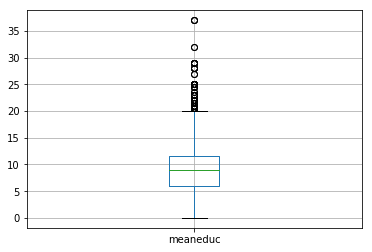

In [51]:
train['meaneduc'].plot(kind = 'box', grid = True)

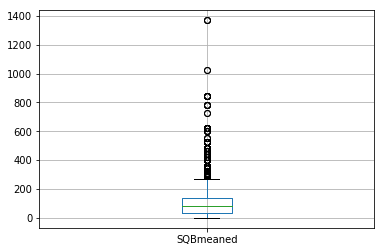

In [52]:
train['SQBmeaned'].plot(kind = 'box', grid = True)

Analisando os box plots, ambos não apresentam tamanha desigualdade, então considerar os dados faltantes como a média da amostra passa a ser uma estratégia interessante.

In [53]:
train['meaneduc'] = train['meaneduc'].fillna(train['meaneduc'].describe().mean())

train['SQBmeaned'] = train['SQBmeaned'].fillna(train['SQBmeaned'].describe().mean())

O restante das linhas com dados faltantes serão eliminadas, mas como 'v18q1' não será levado em consideração na classificação é conveniente filtrar a base pelos atributos relevantes antes do tratamento final dos dados faltantes, como forma de reduzir a quantidade de dados perdidos

#### 2.13 Seleção dos atributos

A partir da descrição da base optou-se por selecionar as features mais relevantes por intuição:

* v2a1: pagamento mensal do aluguel
* hacdor: superlotação de quartos
* v14a: presença de banheiro a casa
* escolari: anos de escolaridade
* rez_esc: anos atrasado na escola
* hhsize: tamanho da casa
* cielorazo: presença de teto na casa
* abastaguadentro: abastecimento de água dentro da casa
* abastaguano: presença de abastecimento de aágua
* noelec: sem eletricidade na casa
* sanitario1: sem banheiro na casa
* hogar_nin: número de crianças entre 0 e 19 anos na casa
* hogar_total: número total de indivíduos na casa
* meaneduc: média de anos de educação para adultos
* tipovivi1: casa própria e totalmente paga
* area1: zona urbana
* SQBovercrowding: superlotação ao quadrado
* SQBmeaned: quadrado da média de anos de educação dos adultos na casa

In [54]:
atributos = ['v2a1', 'hacdor', 'v14a', 'escolari', 'rez_esc', 'hhsize', 'cielorazo', 'abastaguadentro',
             'abastaguano', 'noelec', 'sanitario1', 'hogar_nin', 'hogar_total', 'meaneduc', 'tipovivi1',
             'area1', 'SQBovercrowding', 'SQBmeaned', 'Target']

# Nova base de dados
base = train[atributos]
base = base.astype(np.float)

print(base.shape)
base.head()

(9557, 19)


,v2a1,hacdor,v14a,escolari,rez_esc,hhsize,cielorazo,abastaguadentro,abastaguano,noelec,sanitario1,hogar_nin,hogar_total,meaneduc,tipovivi1,area1,SQBovercrowding,SQBmeaned,Target
0,190000.0,0.0,1.0,10.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,10.0,0.0,1.0,1.000000,100.0,4.0
1,135000.0,0.0,1.0,12.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,12.0,0.0,1.0,1.000000,144.0,4.0
2,0.0,0.0,1.0,11.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,11.0,1.0,1.0,0.250000,121.0,4.0
3,180000.0,0.0,1.0,9.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,2.0,4.0,11.0,0.0,1.0,1.777778,121.0,4.0
4,180000.0,0.0,1.0,11.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,2.0,4.0,11.0,0.0,1.0,1.777778,121.0,4.0


In [55]:
colunas_nulas = base.isnull().sum().sort_values(ascending = False)

porcentagem = ((base.isnull().sum()/base.isnull().count())*100).sort_values(ascending = False)

faltantes = pd.concat([colunas_nulas, porcentagem], axis = 1, keys = ['Total', '%'])
faltantes.head()

,Total,%
v2a1,949,9.929894
rez_esc,350,3.662237
abastaguano,0,0.000000
hacdor,0,0.000000
v14a,0,0.000000


In [56]:
# Retirando os demais dados faltantes

base = base.dropna()
base.shape

(8288, 19)

In [57]:
colunas_nulas = base.isnull().sum().sort_values(ascending = False)

porcentagem = ((base.isnull().sum()/base.isnull().count())*100).sort_values(ascending = False)

faltantes = pd.concat([colunas_nulas, porcentagem], axis = 1, keys = ['Total', '%'])
faltantes.head()

,Total,%
Target,0,0.0
abastaguano,0,0.0
hacdor,0,0.0
v14a,0,0.0
escolari,0,0.0


### 2.2 - Classificador k-NN


In [58]:
# Treino

x_train = base.drop('Target', axis = 1)

y_train = base['Target']

#### 2.21 Seleção do hiperparâmetro k por Validação Cruzada

In [62]:
inf = 1
sup = 65

scores_media = []
aux = 0
k_max = 0

i = 0
for k in range(inf, sup):
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x_train, y_train, cv=10)
    scores_media.append(scores.mean())
    
    if scores_media[i] > aux:
        k_max = k
        aux = scores_media[i]
        
    i = i + 1
    
print(k_max)

56


Text(0.5, 1.0, 'Perfomance do algoritmo conforme o valor de k')

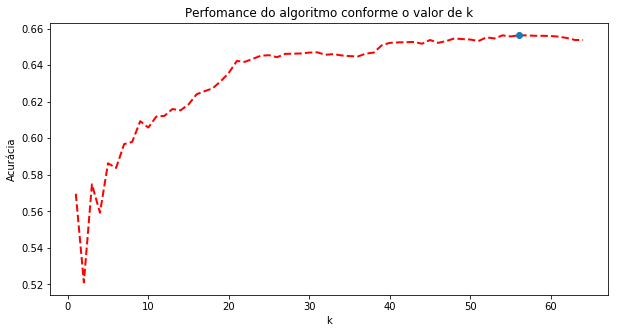

In [63]:
x = np.arange(1, sup)

plt.figure(figsize=(10, 5))
plt.plot(x, scores_media, '--', color = 'red', linewidth = 2)
plt.plot(k_max, scores_media[k_max], 'o')

plt.xlabel('k')
plt.ylabel('Acurácia')
plt.title('Perfomance do algoritmo conforme o valor de k')

In [64]:
print('Acurácia para k = {0} : {1:2.2f}%'.format(k_max, 100 * scores_media[k_max]))

Acurácia para k = 56 : 65.63%


No gráfico acima pode-se observar a acurácia obtida através da validação cruzada conforme o valor de k.